In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/covid_19_data.csv')

In [ ]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [ ]:
 df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [ ]:
preprocessed_df = df.groupby(df['ObservationDate'].dt.date)['Confirmed','Deaths','Recovered'].agg(['sum']) #算總和

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
preprocessed_df

,Confirmed,Deaths,Recovered
,sum,sum,sum
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0


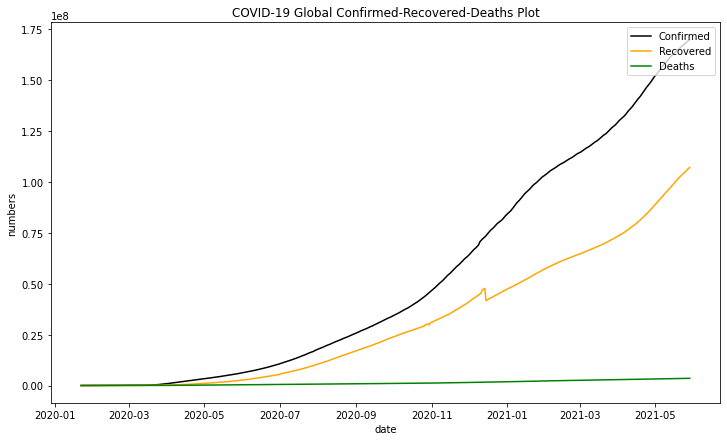

In [ ]:
plt.figure(figsize=(12,7))
plt.title('COVID-19 Global Confirmed-Recovered-Deaths Plot')
plt.xlabel("date")
plt.ylabel("numbers")
xplot = preprocessed_df.index # 橫軸為日期
y_confirmed = preprocessed_df.iloc[:,0].values # 縱軸為確診數
y_deaths = preprocessed_df.iloc[:,1].values    # 縱軸為死亡數
y_recovered = preprocessed_df.iloc[:,2].values # 縱軸為復原數

plt.plot(xplot,y_confirmed, label='Confirmed',color='black')
plt.plot(xplot,y_recovered, label='Recovered',color='orange')
plt.plot(xplot,y_deaths, label='Deaths',color='g')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df['Country/Region'].unique() # 抓出國家

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [ ]:
x = df[df['Country/Region']=='Taiwan'] #選要做分析的國家

In [ ]:
x

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
28,29,2020-01-22,Taiwan,Taiwan,1/22/2020 17:00,1.0,0.0,0.0
68,69,2020-01-23,Taiwan,Taiwan,1/23/20 17:00,1.0,0.0,0.0
111,112,2020-01-24,Taiwan,Taiwan,1/24/20 17:00,3.0,0.0,0.0
160,161,2020-01-25,Taiwan,Taiwan,1/25/20 17:00,3.0,0.0,0.0
207,208,2020-01-26,Taiwan,Taiwan,1/26/20 16:00,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302756,302757,2021-05-25,NaN,Taiwan,2021-05-26 04:20:35,5456.0,35.0,1133.0
303521,303522,2021-05-26,NaN,Taiwan,2021-05-27 04:20:59,6091.0,46.0,1133.0
304286,304287,2021-05-27,NaN,Taiwan,2021-05-28 04:20:36,6761.0,59.0,1133.0
305051,305052,2021-05-28,NaN,Taiwan,2021-05-29 04:20:41,7315.0,78.0,1133.0


In [ ]:
 x['ObservationDate'] = pd.to_datetime(x['ObservationDate']) #將data time轉換成 python data time(統一last update的格式)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#x.head() #印出前五筆

In [ ]:
#x.groupby(x['Last Update'])

In [ ]:
preprocessed_x = x.groupby(x['ObservationDate'].dt.date)['Confirmed','Deaths','Recovered'].agg(['sum']) #算總和

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
 preprocessed_x

,Confirmed,Deaths,Recovered
,sum,sum,sum
ObservationDate,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,3.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,4.0,0.0,0.0
...,...,...,...
2021-05-25,5456.0,35.0,1133.0
2021-05-26,6091.0,46.0,1133.0


In [ ]:
# preprocessed_x.iloc[:,0]

In [ ]:
 preprocessed_x.index # 印出x的index

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31,
       ...
       2021-05-20, 2021-05-21, 2021-05-22, 2021-05-23, 2021-05-24, 2021-05-25,
       2021-05-26, 2021-05-27, 2021-05-28, 2021-05-29],
      dtype='object', name='ObservationDate', length=494)

In [ ]:
x

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
28,29,2020-01-22,Taiwan,Taiwan,1/22/2020 17:00,1.0,0.0,0.0
68,69,2020-01-23,Taiwan,Taiwan,1/23/20 17:00,1.0,0.0,0.0
111,112,2020-01-24,Taiwan,Taiwan,1/24/20 17:00,3.0,0.0,0.0
160,161,2020-01-25,Taiwan,Taiwan,1/25/20 17:00,3.0,0.0,0.0
207,208,2020-01-26,Taiwan,Taiwan,1/26/20 16:00,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302756,302757,2021-05-25,NaN,Taiwan,2021-05-26 04:20:35,5456.0,35.0,1133.0
303521,303522,2021-05-26,NaN,Taiwan,2021-05-27 04:20:59,6091.0,46.0,1133.0
304286,304287,2021-05-27,NaN,Taiwan,2021-05-28 04:20:36,6761.0,59.0,1133.0
305051,305052,2021-05-28,NaN,Taiwan,2021-05-29 04:20:41,7315.0,78.0,1133.0


Confirmed-Recovered-Deaths Plot of Taiwan

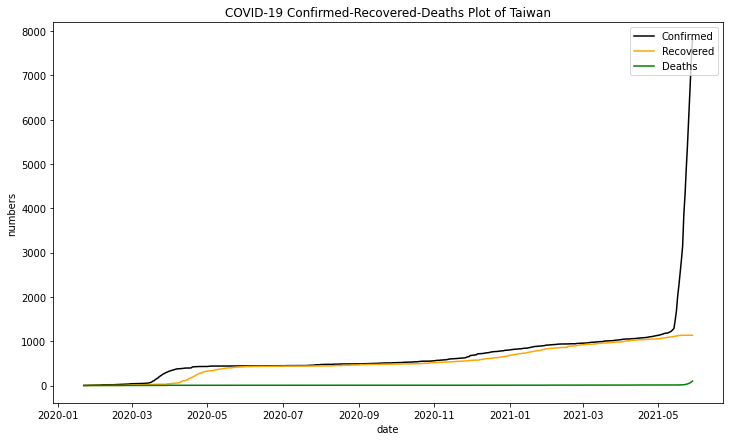

In [ ]:
plt.figure(figsize=(12,7))
plt.title('COVID-19 Confirmed-Recovered-Deaths Plot of Taiwan')
plt.xlabel("date")
plt.ylabel("numbers")
xplot = preprocessed_x.index # 橫軸為日期
y_confirmed = preprocessed_x.iloc[:,0].values # 縱軸為確診數
y_deaths = preprocessed_x.iloc[:,1].values    # 縱軸為死亡數
y_recovered = preprocessed_x.iloc[:,2].values # 縱軸為復原數

plt.plot(xplot,y_confirmed, label='Confirmed',color='black')
plt.plot(xplot,y_recovered, label='Recovered',color='orange')
plt.plot(xplot,y_deaths, label='Deaths',color='g')
plt.legend(loc='upper right')
plt.show()

累積病例數

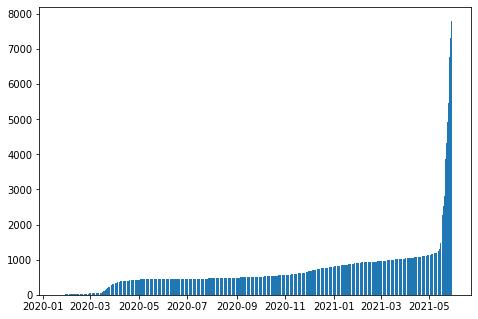

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xplot,y_confirmed)
plt.show()

累積死亡數

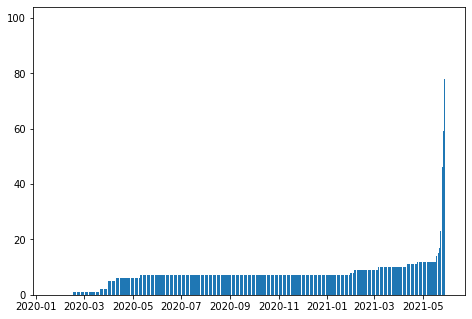

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xplot,y_deaths)
plt.show()

累積復原數

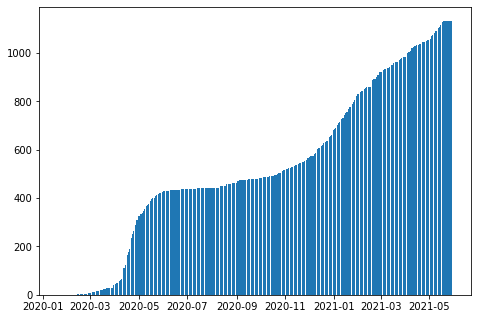

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xplot,y_recovered)
plt.show()

Using the historical day Predicting the deaths ,confirmed cases and recovered on that day

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import load_model

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset

In [ ]:
X = []
for i in range(len(xplot)):
  X.append(i)

CONFIRMED TIME SERIES ANALYSIS TAIWAN

In [ ]:
confirmed = y_confirmed

In [ ]:
# split into train and test sets
train_size = 300
test_size = len(y_confirmed) - train_size
trainX,testX = X[0:train_size],X[train_size:]
trainY, testY = y_confirmed[0:train_size], y_confirmed[train_size:]

In [ ]:
look_back = 3
trainX, trainY = create_dataset(trainY, look_back)
testX, testY = create_dataset(testY, look_back)

In [ ]:
print(trainX.shape,trainY.shape,testX.shape, testY.shape)

(296, 3) (296,) (190, 3) (190,)


In [ ]:
#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(20, input_shape=(look_back, 1), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='MSE', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=8)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 146474.8750
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 36867.2578
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 161.6002
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 60.4948
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 57.3528
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 56.2305
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 53.3906
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 45.8922
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 32.7368
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 12.9679
Epoch 11/100
37/37 [==============================] - 0s 4ms/step - loss: 15.0211
Epoch 12/100
37/37 [==============================] - 0s 3ms/step - loss: 30.5043
Epoch 13/100
37/3

In [ ]:
import tensorflow as tf

In [ ]:
# THe function generates predictions from the model for a given series
def model_forecast(model,series,window_size):
  ds = tf.data.Dataset.from_tensor_slices(series) # 它的作用是切分傳入Tensor的第一個維度，生成相應的dataset。將輸入的張量的第一個維度看做樣本的個數，沿其第一個維度將tensor切片，得到的每個切片是一個樣本數據。實現了輸入張量的自動切片
  ds = ds.window(window_size,shift=1,drop_remainder = True) # 滑動視窗，而drop_remainder=True表示丟棄不足窗口寬度的數據
  ds = ds.flat_map(lambda w: w.batch(window_size+1)) #可以獲取數據集的數據集並將其展平為單個數據集
  ds = ds.batch(32).prefetch(1) #batch(32) -> 每次取32個，prefetch()：在訓練時，同時讀取下一批資料，並作轉換。
  return model.predict(ds)

In [ ]:
forecast = model_forecast(model,y_confirmed[train_size-look_back:-1],look_back)
forecast = forecast[:,0]

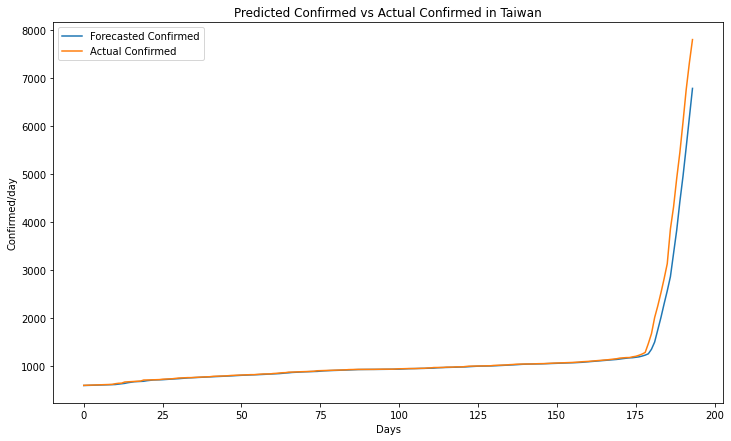

[ 601.8685   603.5873   605.2832   607.2761   609.26917  610.4114
  613.55756  615.6303   617.68494  620.1089   622.3333   630.3209
  638.59576  646.50116  660.2026   669.41656  680.1823   683.4495
  687.20496  690.30707  701.95337  709.2195   716.58704  717.99054
  720.83716  722.9607   727.8248   731.6089   736.50995  739.3555
  744.0709   750.0019   755.13947  759.76404  762.7392   764.7542
  767.3443   771.00275  773.848    777.32697  779.7097   782.5755
  787.4202   791.07733  794.8516   796.8483   799.2703   803.245
  807.4957   811.65643  814.52264  816.81573  819.2377   821.93665
  824.9318   826.6512   830.0919   833.45404  838.0404   840.3329
  841.94336  845.6226   849.8349   856.2898   861.96484  866.5508
  873.5607   877.1991   881.7342   884.69135  886.9647   888.8714
  890.4244   892.40186  895.54596  901.4991   906.30396  910.2461
  912.3916   914.36926  916.6625   919.5102   921.6357   924.3738
  925.9262   929.2186   931.7501   934.2107   935.5056   936.07886
  936.37

In [ ]:
plt.figure(figsize = (12,7))
plt.plot(forecast,label = 'Forecasted Confirmed')
plt.plot(confirmed[train_size:],label = 'Actual Confirmed')
plt.legend(loc = 'upper left')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Confirmed/day')
plt.title('Predicted Confirmed vs Actual Confirmed in Taiwan')
plt.show()

print(forecast)
print(confirmed[train_size:])

Deaths Time Series Analaysis Taiwan

In [ ]:
deaths = y_deaths

In [ ]:
# split into train and test sets
train_size = 300
test_size = len(y_deaths) - train_size
trainX,testX = X[0:train_size],X[train_size:]
trainY, testY = y_deaths[0:train_size], y_deaths[train_size:]

In [ ]:
look_back = 3
trainX, trainY = create_dataset(trainY, look_back)
testX, testY = create_dataset(testY, look_back)

In [ ]:
print(trainX.shape,trainY.shape,testX.shape, testY.shape)

(296, 3) (296,) (190, 3) (190,)


In [ ]:
model = Sequential()
model.add(LSTM(20, input_shape=(look_back, 1), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='MSE', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=8)


Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 132445.5938
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 56448.5195
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 1754.5950
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 76.1687
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 23.8208
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 13.4434
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 13.6370
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 13.9972
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 10.6709
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 10.6102
Epoch 11/100
37/37 [==============================] - 0s 3ms/step - loss: 11.0237
Epoch 12/100
37/37 [==============================] - 0s 3ms/step - loss: 10.9319
Epoch 13/100
37/

In [ ]:
forecast = model_forecast(model,y_deaths[train_size-look_back:-1],look_back)
forecast = forecast[:,0]

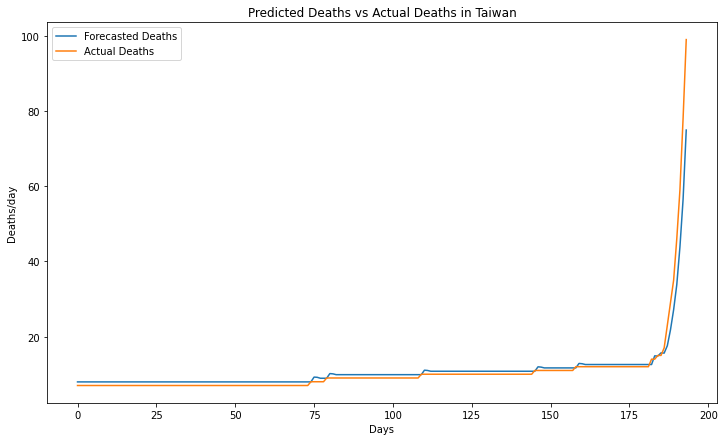

[ 7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.959058   7.959058   7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.959058   7.959058   7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564  7.9590564
  7.9590564  7.9590564  7.9590564  9.235977   9.181782   8.929775
  8.929775   8.929775  10.168945  10.098411   9.881954   9.881954
  9.881954   9.881954   9.881954   9.881954   9.881954   9.88195

In [ ]:
plt.figure(figsize = (12,7))
plt.plot(forecast,label = 'Forecasted Deaths')
plt.plot(deaths[train_size:],label = 'Actual Deaths')
plt.legend(loc = 'upper left')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Deaths/day')
plt.title('Predicted Deaths vs Actual Deaths in Taiwan')
plt.show()

print(forecast)
print(deaths[train_size:])

Recovered TimeSeries Analysis Taiwan

In [ ]:
recovered = y_recovered

In [ ]:
# split into train and test sets
train_size = 300
test_size = len(y_recovered) - train_size
trainX,testX = X[0:train_size],X[train_size:]
trainY, testY = y_recovered[0:train_size], y_recovered[train_size:]

In [ ]:
look_back = 3
trainX, trainY = create_dataset(trainY, look_back)
testX, testY = create_dataset(testY, look_back)

In [ ]:
print(trainX.shape,trainY.shape,testX.shape, testY.shape)

(296, 3) (296,) (190, 3) (190,)


In [ ]:
model = Sequential()
model.add(LSTM(20, input_shape=(look_back, 1), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='MSE', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=8)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 74583.9062
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 7375.2222
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 113.7061
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 25.8236
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 22.6953
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 21.3178
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 19.3481
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 15.6322
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 15.9164
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 17.1479
Epoch 11/100
37/37 [==============================] - 0s 3ms/step - loss: 14.5903
Epoch 12/100
37/37 [==============================] - 0s 3ms/step - loss: 12.7536
Epoch 13/100
37/37 

In [ ]:
forecast = model_forecast(model,y_recovered[train_size-look_back:-1],look_back)
forecast = forecast[:,0]

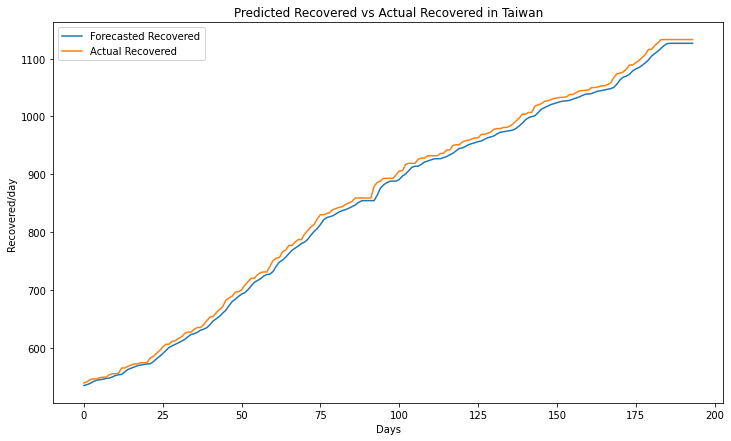

[ 534.6279   536.1029   538.3089   541.2874   543.6524   544.4513
  545.4648   546.7859   547.4006   549.3346   551.9812   553.2106
  553.85394  558.43036  562.4245   564.6177   566.841    568.9017
  569.9515   571.0525   571.92255  572.1023   575.7862   580.6586
  584.9832   589.74005  595.1365   600.5133   603.23785  605.97864
  608.639    611.3581   614.58887  619.023    622.8532   624.25653
  626.7327   630.32385  632.0828   634.6446   640.0809   646.3764
  650.09937  654.28094  659.7773   664.8997   672.61505  679.77985
  683.87683  688.77655  692.612    695.0322   700.1387   706.7255
  712.843    716.02924  719.29816  723.82104  726.57477  727.35846
  732.04767  741.12476  748.2818   751.37177  756.76     762.70294
  768.5684   772.40375  775.8365   780.3668   782.6615   787.60114
  794.8468   801.1357   806.1697   813.06976  821.11304  825.0882
  826.59326  828.41156  831.77826  835.1099   837.3454   838.8702
  841.3277   844.1274   846.74005  851.0163   853.95953  854.4598
  85

In [ ]:
plt.figure(figsize = (12,7))
plt.plot(forecast,label = 'Forecasted Recovered')
plt.plot(recovered[train_size:],label = 'Actual Recovered')
plt.legend(loc = 'upper left')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Recovered/day')
plt.title('Predicted Recovered vs Actual Recovered in Taiwan')
plt.show()

print(forecast)
print(recovered[train_size:])